In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Load the merged count file
merged_counts_path = r"C:/Users/dharm/Documents/Biostate/count_files/merged_counts.txt"
output_dir = r"C:/Users/dharm/Documents/Biostate/count_files/scatters_plots/"
data = pd.read_csv(merged_counts_path, sep='\t')

# Remove the 'gene_name' column for correlation analysis
count_data = data.set_index('Geneid')

# Calculate pairwise correlation between samples
correlation_matrix = count_data.corr()

In [3]:
print("Sample Correlation Matrix:")
print(correlation_matrix)

Sample Correlation Matrix:
              Heart_ZT0_1  Heart_ZT0_2  Heart_ZT12_1  Heart_ZT12_2  \
Heart_ZT0_1      1.000000     0.998139      0.988621      0.955846   
Heart_ZT0_2      0.998139     1.000000      0.991381      0.965250   
Heart_ZT12_1     0.988621     0.991381      1.000000      0.982102   
Heart_ZT12_2     0.955846     0.965250      0.982102      1.000000   
Liver_ZT0_1      0.187642     0.185081      0.185371      0.185179   
Liver_ZT0_2      0.200918     0.198736      0.200054      0.200352   
Liver_ZT12_1     0.205959     0.205722      0.213452      0.223804   
Liver_ZT12_2     0.234213     0.235442      0.246326      0.266228   

              Liver_ZT0_1  Liver_ZT0_2  Liver_ZT12_1  Liver_ZT12_2  
Heart_ZT0_1      0.187642     0.200918      0.205959      0.234213  
Heart_ZT0_2      0.185081     0.198736      0.205722      0.235442  
Heart_ZT12_1     0.185371     0.200054      0.213452      0.246326  
Heart_ZT12_2     0.185179     0.200352      0.223804      0.266228

In [14]:
# Scatter plot for pairwise sample comparisons
# Loop through each pair of samples
for i, sample1 in enumerate(count_data.columns):
    for j, sample2 in enumerate(count_data.columns):
        if i < j:  # Only plot each pair once
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=count_data[sample1], y=count_data[sample2], alpha=0.5)
            plt.xlabel(sample1)
            plt.ylabel(sample2)
            plt.title(f'Scatter Plot of {sample1} vs {sample2}')
            plt.xscale('log')
            plt.yscale('log')
            plt.plot([1, max(count_data[sample1].max(), count_data[sample2].max())],
                     [1, max(count_data[sample1].max(), count_data[sample2].max())],
                     'r--')  # Line of perfect correlation
            #plt.show()
            # Save the figure
            plt.savefig(f"{output_dir}/{sample1}_vs_{sample2}_scatter.png")
            plt.close() 

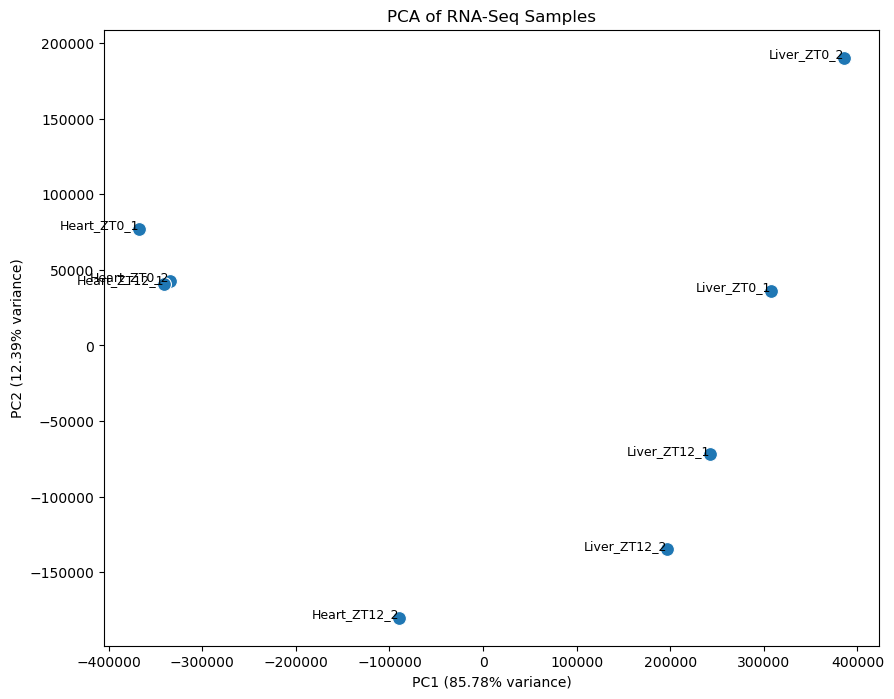

PCA plot saved to C:/Users/dharm/Documents/Biostate/count_files/scatters_plots//PCA_plot.png


In [17]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(count_data.T)  # Transpose to have samples as rows

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=count_data.columns)

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100)

# Annotate points with sample names
for sample in pca_df.index:
    plt.text(pca_df.loc[sample, 'PC1'], pca_df.loc[sample, 'PC2'], sample, fontsize=9, ha='right')

plt.title("PCA of RNA-Seq Samples")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")

# Save the PCA plot
pca_output_path = f"{output_dir}/PCA_plot.png"
plt.savefig(pca_output_path)
plt.show()
print(f"PCA plot saved to {pca_output_path}")

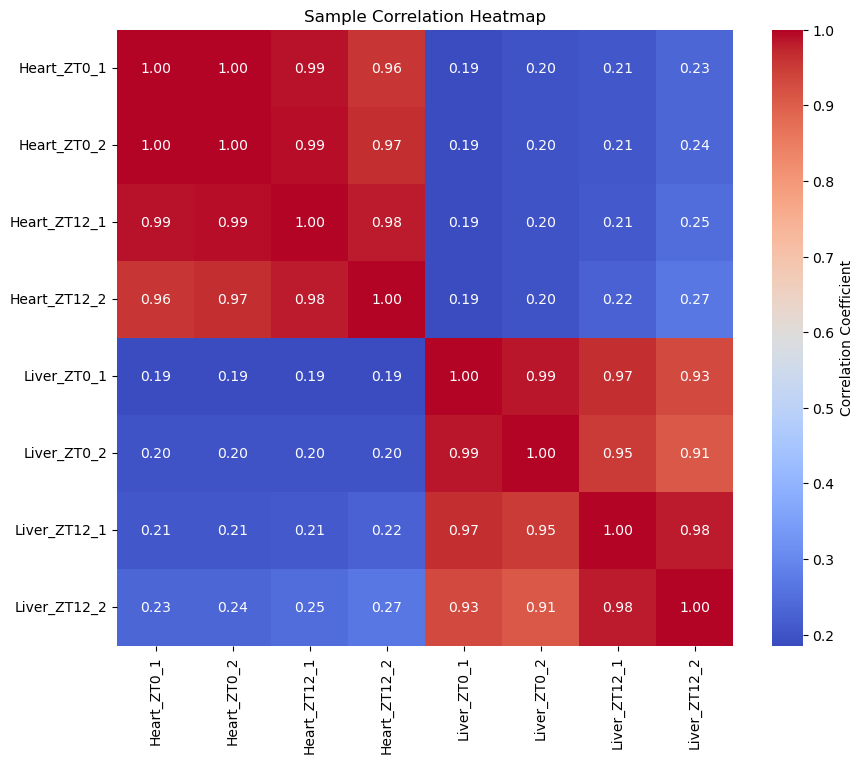

In [4]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            cbar_kws={'label': 'Correlation Coefficient'}, square=True)
plt.title("Sample Correlation Heatmap")

# Save the heatmap
heatmap_output_path = f"{output_dir}/correlation_heatmap.png"
plt.savefig(heatmap_output_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()